In [1]:
%run import_util.py
import scan_api
import util

START loading util functions
DONE loading util functions


In [2]:
# set the data folder to work on
util.data_directory="./data/"
print(util.data_directory)
n=2
n1=10

./data/


In [3]:
from datetime import date, timedelta
dataLatestdate = date.today()- timedelta(1)

# m/dd/yy
dateStr=dataLatestdate.strftime("%#m/%d/%y")
print("dateStr =", dateStr)

dateStr = 4/29/20


# read covid_data

In [4]:
df0=util.read_file("generated_data/covid_timeseries_deaths.csv")
df1=util.read_file("generated_data/covid_timeseries_cases.csv")
df2=util.read_file("generated_data/covid_timeseries_recovered.csv")
dfList=[df0,df1,df2]

In [5]:
population=util.read_file("generated_data/world_population.csv")
display(population.head(n))

,country,poptotal_young,poptotal_old,poptotal,young_perc,old_perc
0,Afghanistan,37897103.0,1031238.0,38928341.0,97.350933,2.649067
1,Albania,2454631.0,423169.0,2877800.0,85.295399,14.704601


In [6]:
covid_population=pd.merge(df0,population,on=["country"],how="left")
len(covid_population['poptotal'])

185

In [7]:
# normalise to deaths per million
dfList_perm=[]

for df in dfList:
    df_perm=df.copy()
#     display(df_perm.head(n))  
    df_perm.iloc[:,3:] = df_perm.iloc[:,3:].mul(1/covid_population['poptotal'], axis=0)*1000000
    display(df_perm.head(n))  
    dfList_perm.append(df_perm)
    
dfList=dfList_perm

,country,lat,long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20
0,Afghanistan,33.0000,65.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.924776,0.924776,1.027529,1.078905,1.104594,1.207347,1.284411,1.464229,1.489917,1.541294
1,Albania,41.1533,20.1683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.034679,9.034679,9.382167,9.382167,9.382167,9.382167,9.729655,9.729655,10.424630,10.424630


,country,lat,long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20
0,Afghanistan,33.0000,65.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.356119,28.051542,30.209353,32.855240,34.704793,37.581874,39.328673,43.747048,46.958076,49.809469
1,Albania,41.1533,20.1683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,202.932796,211.619987,220.307179,230.384321,235.596636,247.411217,252.276044,255.750921,260.615748,266.175551


,country,lat,long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20
0,Afghanistan,33.0000,65.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.467910,3.853234,4.264245,4.598192,4.829386,4.829386,5.317463,5.651410,5.856915,6.473433
1,Albania,41.1533,20.1683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,113.628466,119.883244,123.705608,133.782751,136.910140,140.037529,142.469942,146.639794,149.767183,158.106887


# EDA Start - plot day0 data

In [8]:
dfList_Countries1=[]

countryList=util.countryList
for i, df in enumerate(dfList):
    df1=df[df['country'].isin(countryList)]
    df1.drop({'lat','long'},axis=1,inplace=True)
    df1.sort_values('country')
    df1=df1.rename(util.new_countries)
    dfList_Countries1.append(df1)

mean_after_zero=[]
min_after_zero=[]
for df1 in dfList_Countries1:
    df2=df1.copy()
    mean1=np.nanmean(df2.iloc[:,1:])
    min1=np.nanmin(df2.iloc[:,1:].replace(0, np.nan).values)
    mean_after_zero.append(mean1)
    min_after_zero.append(min1)

dfList_Countries=[]
for i, df in enumerate(dfList_Countries1):
    high_death_rate_countries=df[df[dateStr]>=mean_after_zero[i]]
    low_death_rate_countries=df[df[dateStr]<mean_after_zero[i]]
    dfList_Countries.append(high_death_rate_countries)
    dfList_Countries.append(low_death_rate_countries)
    
    
for i, df in enumerate(dfList_Countries):
    df2=df.rename(columns={"country":"day"})
    df2=df2.set_index('day').transpose()
    df2=df2.reset_index().rename(columns={"index":"date"})
    df2['date']= pd.to_datetime(df2['date'])
    countryListFilter=df2.columns.drop('date')
    df2[countryListFilter] = df2[countryListFilter].apply(pd.to_numeric)
    dfList_Countries[i]=df2

print(mean_after_zero)
print(min_after_zero)

for df in dfList_Countries:
    display(df.head(n))

[32.81322320615092, 446.60847448192857, 108.2235189323852]
[0.00072463537860425, 0.00072463537860425, 0.0021739061358127497]


day,date,Belgium,Canada,France,Germany,Iran,Ireland,Italy,Netherlands,Norway,Portugal,Spain,Sweden,Switzerland,Turkey,USA,UK
0,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


day,date,Australia,Brazil,China,India,Indonesia,Israel,S. Korea,Russia
0,2020-01-22,0.0,0.0,0.011811,0.0,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.012506,0.0,0.0,0.0,0.0,0.0


day,date,Belgium,Canada,France,Germany,Iran,Ireland,Israel,Italy,Netherlands,Norway,Portugal,Russia,Spain,Sweden,Switzerland,Turkey,USA,UK
0,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003021,0.0
1,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003021,0.0


day,date,Australia,Brazil,China,India,Indonesia,S. Korea
0,2020-01-22,0.0,0.0,0.380734,0.0,0.0,0.019505
1,2020-01-23,0.0,0.0,0.446738,0.0,0.0,0.019505


day,date,Australia,Belgium,Brazil,Canada,France,Germany,Iran,Ireland,Israel,Italy,S. Korea,Portugal,Spain,Switzerland,Turkey,USA
0,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


day,date,China,India,Indonesia,Netherlands,Norway,Russia,Sweden,UK
0,2020-01-22,0.019454,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-23,0.020843,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
def dayZeroData(df,country,mydict,dayzero):
    df4 = df[['date',country]]
    df4 = df4.set_index('date')
    df4=df4[df4[country]>dayzero]
    df4.reset_index(inplace=True)
    mydict.update( {country : df4.head(1).date[0]} )
    df4.drop({'date'},axis=1,inplace=True)
    return df4

def pltDataDay0(df, dayzero,
                graphTitle="cases/million",
                xlabel="Number of days from day0",
                ylabel="cases/million"):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title("Rate of growth after " + str(round(dayzero,5)) + " "+ graphTitle + " , dated " + dataLatestdate.strftime("%d/%m/%y")) 
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Number of " + ylabel)
    mydict = {}
    
    countryL=df.columns.drop('date')
    for cols in countryL:
        x=dayZeroData(df,cols,mydict,dayzero)
        x.plot(ax=ax)

    display(mydict)
    plt.show()
#     return mydict

Death per million plots


{'Belgium': Timestamp('2020-03-11 00:00:00'),
 'Canada': Timestamp('2020-03-09 00:00:00'),
 'France': Timestamp('2020-02-15 00:00:00'),
 'Germany': Timestamp('2020-03-09 00:00:00'),
 'Iran': Timestamp('2020-02-19 00:00:00'),
 'Ireland': Timestamp('2020-03-11 00:00:00'),
 'Italy': Timestamp('2020-02-21 00:00:00'),
 'Netherlands': Timestamp('2020-03-06 00:00:00'),
 'Norway': Timestamp('2020-03-14 00:00:00'),
 'Portugal': Timestamp('2020-03-17 00:00:00'),
 'Spain': Timestamp('2020-03-03 00:00:00'),
 'Sweden': Timestamp('2020-03-11 00:00:00'),
 'Switzerland': Timestamp('2020-03-05 00:00:00'),
 'Turkey': Timestamp('2020-03-17 00:00:00'),
 'USA': Timestamp('2020-02-29 00:00:00'),
 'UK': Timestamp('2020-03-06 00:00:00')}

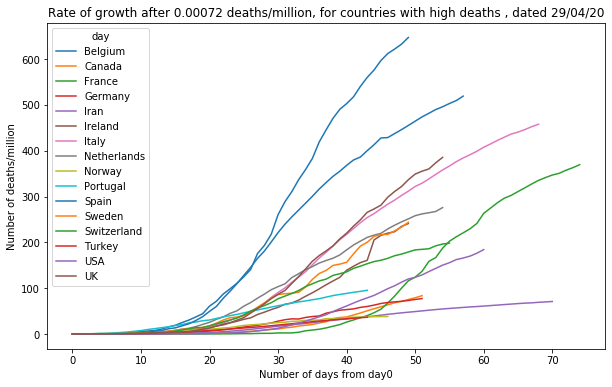

{'Australia': Timestamp('2020-03-01 00:00:00'),
 'Brazil': Timestamp('2020-03-17 00:00:00'),
 'China': Timestamp('2020-01-22 00:00:00'),
 'India': Timestamp('2020-03-13 00:00:00'),
 'Indonesia': Timestamp('2020-03-11 00:00:00'),
 'Israel': Timestamp('2020-03-21 00:00:00'),
 'S. Korea': Timestamp('2020-02-20 00:00:00'),
 'Russia': Timestamp('2020-03-19 00:00:00')}

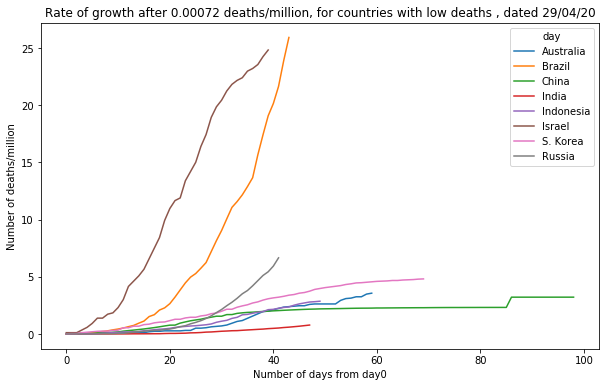

In [10]:
print("Death per million plots")
pltDataDay0(dfList_Countries[0],dayzero=min_after_zero[0],graphTitle="deaths/million, for countries with high deaths",ylabel="deaths/million")
pltDataDay0(dfList_Countries[1],dayzero=min_after_zero[0],graphTitle="deaths/million, for countries with low deaths",ylabel="deaths/million")

Cases per million plots


{'Belgium': Timestamp('2020-02-04 00:00:00'),
 'Canada': Timestamp('2020-01-26 00:00:00'),
 'France': Timestamp('2020-01-24 00:00:00'),
 'Germany': Timestamp('2020-01-27 00:00:00'),
 'Iran': Timestamp('2020-02-19 00:00:00'),
 'Ireland': Timestamp('2020-02-29 00:00:00'),
 'Israel': Timestamp('2020-02-21 00:00:00'),
 'Italy': Timestamp('2020-01-31 00:00:00'),
 'Netherlands': Timestamp('2020-02-27 00:00:00'),
 'Norway': Timestamp('2020-02-26 00:00:00'),
 'Portugal': Timestamp('2020-03-02 00:00:00'),
 'Russia': Timestamp('2020-01-31 00:00:00'),
 'Spain': Timestamp('2020-02-01 00:00:00'),
 'Sweden': Timestamp('2020-01-31 00:00:00'),
 'Switzerland': Timestamp('2020-02-25 00:00:00'),
 'Turkey': Timestamp('2020-03-11 00:00:00'),
 'USA': Timestamp('2020-01-22 00:00:00'),
 'UK': Timestamp('2020-01-31 00:00:00')}

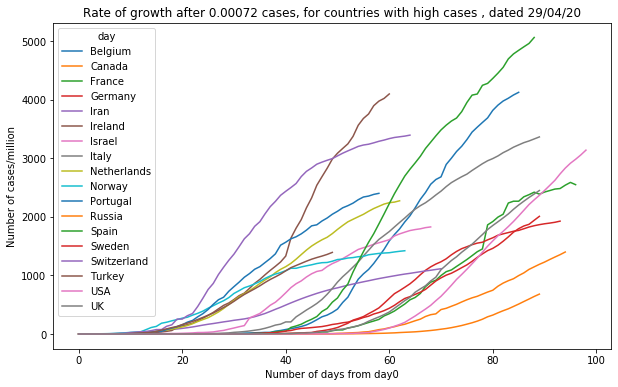

{'Australia': Timestamp('2020-01-26 00:00:00'),
 'Brazil': Timestamp('2020-02-26 00:00:00'),
 'China': Timestamp('2020-01-22 00:00:00'),
 'India': Timestamp('2020-02-02 00:00:00'),
 'Indonesia': Timestamp('2020-03-02 00:00:00'),
 'S. Korea': Timestamp('2020-01-22 00:00:00')}

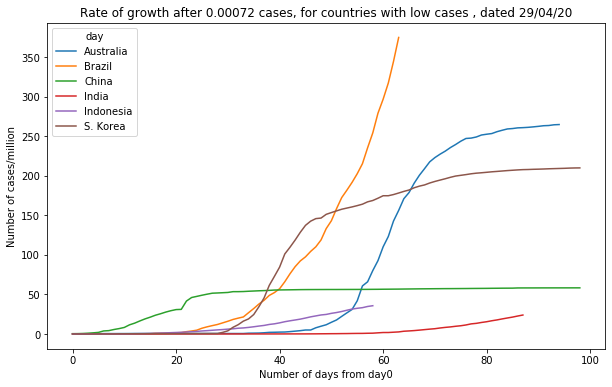

In [11]:
print("Cases per million plots")
pltDataDay0(dfList_Countries[2],graphTitle="cases, for countries with high cases", dayzero=min_after_zero[1])
pltDataDay0(dfList_Countries[3],graphTitle="cases, for countries with low cases",dayzero=min_after_zero[1])

Recovered per million plots


{'Australia': Timestamp('2020-01-30 00:00:00'),
 'Belgium': Timestamp('2020-02-17 00:00:00'),
 'Brazil': Timestamp('2020-03-16 00:00:00'),
 'Canada': Timestamp('2020-02-12 00:00:00'),
 'France': Timestamp('2020-02-12 00:00:00'),
 'Germany': Timestamp('2020-02-13 00:00:00'),
 'Iran': Timestamp('2020-02-26 00:00:00'),
 'Ireland': Timestamp('2020-03-17 00:00:00'),
 'Israel': Timestamp('2020-02-27 00:00:00'),
 'Italy': Timestamp('2020-02-22 00:00:00'),
 'S. Korea': Timestamp('2020-02-07 00:00:00'),
 'Portugal': Timestamp('2020-03-13 00:00:00'),
 'Spain': Timestamp('2020-02-15 00:00:00'),
 'Switzerland': Timestamp('2020-03-03 00:00:00'),
 'Turkey': Timestamp('2020-03-25 00:00:00'),
 'USA': Timestamp('2020-02-09 00:00:00')}

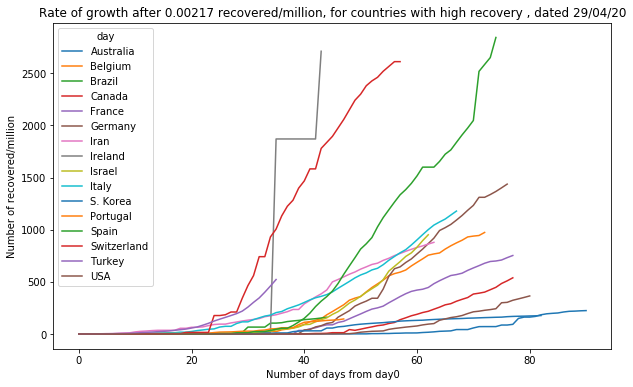

{'China': Timestamp('2020-01-22 00:00:00'),
 'India': Timestamp('2020-03-10 00:00:00'),
 'Indonesia': Timestamp('2020-03-10 00:00:00'),
 'Netherlands': Timestamp('2020-03-14 00:00:00'),
 'Norway': Timestamp('2020-03-09 00:00:00'),
 'Russia': Timestamp('2020-02-12 00:00:00'),
 'Sweden': Timestamp('2020-03-09 00:00:00'),
 'UK': Timestamp('2020-02-12 00:00:00')}

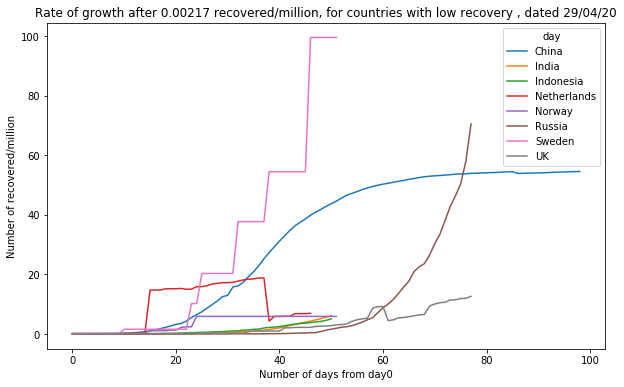

In [12]:
print("Recovered per million plots")
pltDataDay0(dfList_Countries[4],graphTitle="recovered/million, for countries with high recovery",ylabel="recovered/million",dayzero=min_after_zero[2])
pltDataDay0(dfList_Countries[5],graphTitle="recovered/million, for countries with low recovery",ylabel="recovered/million",dayzero=min_after_zero[2])